In [2]:
# Celda de importación de librerias
from nltk.tokenize import word_tokenize, regexp_tokenize
from nltk import regexp_tokenize as rxtoken
from nltk.stem import SnowballStemmer, RegexpStemmer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk, pandas as pd

In [20]:
# Celda del Dataframe
df = pd.read_csv("./WordsDataset/Dataset.csv")
df.info()
#df['Groom'] = df.Groom.map({'True':1, 'False':0})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265866 entries, 0 to 265865
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   User    265866 non-null  object
 1   Text    265866 non-null  object
 2   Groom   265866 non-null  bool  
dtypes: bool(1), object(2)
memory usage: 4.3+ MB


,User,Text,Groom
0,abraxisreborn,like half hour north milwauke,True
1,beckibillybob,town north side,False
2,beckibillybob,suburb,False
3,abraxisreborn,hartford,True
4,beckibillybob,menomone fall,False
...,...,...,...
265861,zachery,babe what address,True
265862,layla,like want cant want come everi night,False
265863,zachery,knew address come,True
265864,layla,need meet first talk phone need know real,False


In [75]:
def tokenization(text):
    #token = word_tokenize(text) # Separa el texto en tokens
    token = regexp_tokenize(text,'[^0-9]') # Extrae los token del texto sin numeros
    token = ''.join(str(k) for k in token) # Une los items de la lista
    return token.split() # Devuelve tokens del texto

In [76]:
def lemmatization(text):
    stemmer = SnowballStemmer('english') # Clase Stemming
    stem_text = []
    for word in text: # Recorro cada palabra en la lista y extraigo su raiz
        stem_text.append(stemmer.stem(word))
    return stem_text # Devuelvo la raiz de cada palabra

In [77]:
def preprocessText(text):
    stopwd = stopwords.words('english') # Conjunto de stopwords
    tokens = tokenization(text) # Obtengo el token del texto
    if tokens:
        # Si el token no pertenece al conjunto de stopwords lo agrego a la lista
        text_without_stopwd = [word for word in tokens if len(word) > 2 and word not in stopwd]
        text_process = lemmatization(text_without_stopwd) # Obtengo la base de cada palabra en la lista
        if text_process:
            return text_process # Devuelvo una lista con las palabras mas significativas

In [78]:
def processText(text):
    token = tokenization(text) # Obtengo el token del texto
    clean_words = [word for word in token if len(word)>2 and word not in stopwords.words('english')]
    lemma_words = lemmatization(clean_words)
    proces_text = [text for text in lemma_words if text]
    proces_text = ' '.join(str(t) for t in proces_text if t)
    return proces_text

In [21]:
"""num_rows = df.shape[0] # Longitud de dataframe
msg, message = [], []
for i in range(0,num_rows):
    msg.append(df['Text'][i]) # Agrego cada texto a la lista
    message.append(preprocessText(msg[i])) # Agrego a la lista el valor devuelto
msg = [m for m in message if m]"""

df.drop_duplicates()
#df.Text.unique()

,User,Text,Groom
0,abraxisreborn,like half hour north milwauke,True
1,beckibillybob,town north side,False
2,beckibillybob,suburb,False
3,abraxisreborn,hartford,True
4,beckibillybob,menomone fall,False
...,...,...,...
265861,zachery,babe what address,True
265862,layla,like want cant want come everi night,False
265863,zachery,knew address come,True
265864,layla,need meet first talk phone need know real,False


In [121]:
#print(len(msg),f"El {(100-len(msg)*100/len(message)):.2f}% son palabras sin importancia",sep='\n')

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
import operator
tokens_bow = CountVectorizer().fit_transform(df['Text'])
print(tokens_bow,tokens_bow.shape,sep='\t')
#vector_sort = sorted(vector.vocabulary_.items(), key=operator.itemgetter(1), reverse=True)
#pos_text = nltk.pos_tag(vector.vocabulary_,tagset='universal')
#pos_text
#frq_dist = nltk.FreqDist(df['Text'])
#frq_dist.most_common(25)

  (0, 9252)	1
  (0, 6959)	1
  (0, 7676)	1
  (0, 11157)	1
  (0, 10219)	1
  (1, 11157)	1
  (1, 17037)	1
  (1, 14460)	1
  (2, 15705)	1
  (3, 7075)	1
  (4, 10068)	1
  (4, 5447)	1
  (5, 14728)	1
  (5, 18881)	1
  (6, 18366)	1
  (7, 10572)	1
  (8, 2805)	1
  (9, 1881)	1
  (9, 11788)	1
  (9, 7148)	1
  (10, 9375)	1
  (11, 2506)	1
  (12, 10788)	1
  (13, 13927)	1
  (13, 9663)	1
  :	:
  (265859, 16699)	1
  (265859, 188)	1
  (265860, 18220)	1
  (265860, 6482)	1
  (265861, 18366)	1
  (265861, 1179)	1
  (265861, 188)	1
  (265862, 9252)	1
  (265862, 2440)	1
  (265862, 18039)	2
  (265862, 3152)	1
  (265862, 5181)	1
  (265862, 10975)	1
  (265863, 3152)	1
  (265863, 8827)	1
  (265863, 188)	1
  (265864, 16072)	1
  (265864, 8849)	1
  (265864, 10805)	2
  (265864, 13152)	1
  (265864, 10032)	1
  (265864, 12200)	1
  (265864, 5709)	1
  (265865, 13163)	1
  (265865, 18039)	1	(265866, 19583)


In [11]:
# Código para extaer los datos de la lista resultante de la función preprocessText()
# Ya no es necesario, los datos ya fueron modificados directamente en el DataFrame
text = []
for i in range(len(msg)):
    if len(msg[i]) > 1:
        for j in range(len(msg[i])):
            text.append(msg[i][j])
    else:
        text.append(msg[i][0])

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tokens_bow, df['Groom'],test_size=0.25, random_state=0)

In [24]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train,y_train)
print(classifier.predict(X_train)[:20])
print(y_train.values[:20])

[ True  True  True False False False  True False  True  True  True False
 False False  True  True  True False  True  True]
[ True  True  True False False False False  True False  True False False
  True False  True  True False False  True  True]


In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = classifier.predict(X_train)
print(classification_report(y_train, y_pred))
print('\n')
print(confusion_matrix(y_train, y_pred))
print('\n')
print(accuracy_score(y_train, y_pred))

              precision    recall  f1-score   support

       False       0.74      0.69      0.71     98642
        True       0.72      0.76      0.73    100757

    accuracy                           0.72    199399
   macro avg       0.73      0.72      0.72    199399
weighted avg       0.73      0.72      0.72    199399



[[68377 30265]
 [24632 76125]]


0.7246876864979263


In [26]:
print(classifier.predict(X_test)[:20])
print(y_test.values[:20])

[False False  True  True False  True  True False  True False False  True
 False  True False False  True  True False False]
[ True False  True  True False  True False  True False False False False
 False  True False  True False False False False]


In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))
print('\n')
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.71      0.68      0.70     32905
        True       0.70      0.73      0.71     33562

    accuracy                           0.70     66467
   macro avg       0.70      0.70      0.70     66467
weighted avg       0.70      0.70      0.70     66467



[[22391 10514]
 [ 9124 24438]]


0.7045451126122737


In [28]:
#message = ' '.join(str(k) for k in text)
frq_dist = nltk.FreqDist(df['Text'])
#frq_dist.plot(30,cumulative=False)

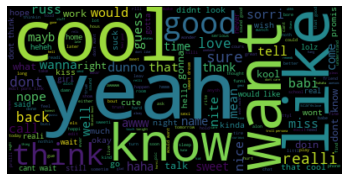

In [29]:
wcloud = WordCloud().generate_from_frequencies(frq_dist)
plt.imshow(wcloud,interpolation='bilinear')
plt.axis('off')
(-0.5,400,200,-0.5)
plt.show()

In [17]:
#nltk.download('universal_tagset')
#pos_text = nltk.pos_tag(df['Text'],tagset='universal')
#pos_text[:20]

In [62]:
#nltk.download('maxent_ne_chunker')
#nltk.download('words')
#nltk.ne_chunk(pos_text) pattern.es

In [49]:
import google_trans_new
from google_trans_new import google_translator

In [51]:
trans = google_translator()
text = "What"
text_translate = trans.translate(text, lang_tgt='es')
print(text_translate)

JSONDecodeError: Extra data: line 1 column 502 (char 501)